In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import pickle

import numpy as np

WDIR = os.environ['DM21CM_DIR']
sys.path.append(WDIR)
import dm21cm.physics as phys

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
from matplotlib.ticker import FixedLocator, FixedFormatter
mpl.rc_file(f"{WDIR}/matplotlibrc")

## 0. plotting

In [2]:
label_dict = {
    'dc' : 'DM21cm',
    'dh' : 'DarkHistory',
    '21' : '21cmFAST',
    'heat' : 'Heating',
    'exc' : 'Excitation',
    'ion' : 'Ionization',
}
color_dict = {
    'dc' : 'k',
    'dh' : cms['binary'](0.4),
    '21' : 'k',
    'heat' : mpl.colors.to_rgb('r'),
    'exc' : mpl.colors.to_rgb('b'),
    'ion' : mpl.colors.to_rgb('g'),
}
ls_dict = {
    'dc' : '-',
    'dh' : '--',
    '21' : '-',
}

z_plot_max = 45.
z_plot_min = 5.

## 1. Adiabatic (no injection)

In [83]:
dc_run_name = 'xc_noLX_nos8_noHe_nosp'
dh_run_name = 'xc_noHe'
save_name = 'xc_noHe_nos8'

In [80]:
dc_run_name = 'xc_noLX_nos8_noHe_nosp_zf001'
dh_run_name = 'xc_noHe_zf001'
save_name = 'xc_noHe_nos8_zf001'

In [86]:
dc_run_name = 'xc_noLX_noHe_nosp'
dh_run_name = 'xc_noHe'
save_name = 'xc_noHe'

In [89]:
dc_run_name = 'xc_noLX'
dh_run_name = 'xc_base'
save_name = 'xc_base'

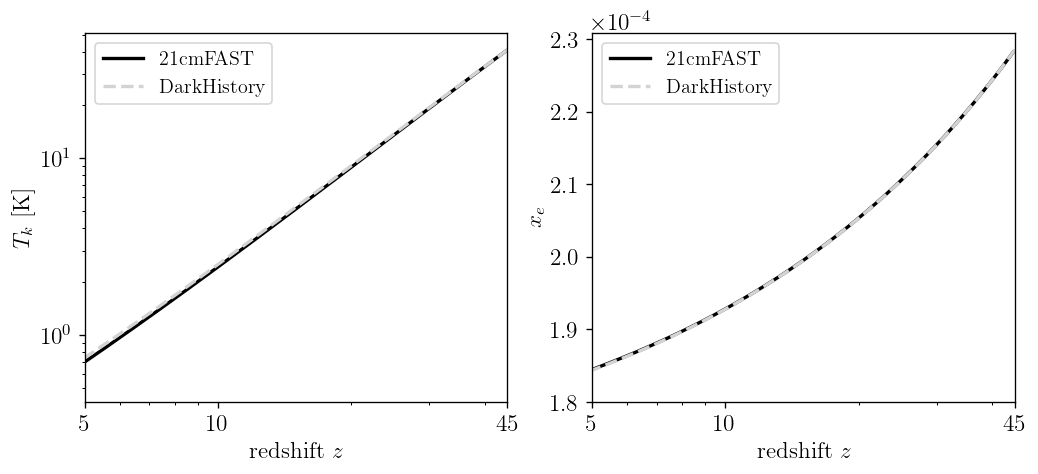

In [90]:
dc_soln = np.load(f'{WDIR}/outputs/dm21cm/{dc_run_name}_records.npy', allow_pickle=True).item()
dh_soln = pickle.load(open(f'{WDIR}/outputs/dh/{dh_run_name}_soln.p', 'rb'))
i_z_st_dh = np.argmin(np.abs(dh_soln['rs']-1 - z_plot_max))

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Tk
ax = axs[0]
ax.plot(dc_soln['z'], dc_soln['T_k'], color=color_dict['21'], label=label_dict['21'], ls=ls_dict['21'], lw=2)
#ax.plot(dc_soln['z'][0], dc_soln['T_k'][0], color=color_dict['21'], marker='+', ms=7, zorder=10)
ax.plot(dh_soln['rs'][i_z_st_dh:] - 1, dh_soln['Tm'][i_z_st_dh:]/phys.kB, color=color_dict['dh'], label=label_dict['dh'], ls=ls_dict['dh'], lw=2)
ax.set(xlim=(z_plot_min, z_plot_max), xscale='log', yscale='log')
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.set(xticks=[5, 10, 45], xticklabels=['5', '10', '45'])
ax.set(xlabel='redshift $z$', ylabel='$T_k$ [K]')
ax.legend()

# x
ax = axs[1]
ax.plot(dc_soln['z'], dc_soln['x_e'], color=color_dict['21'], label=label_dict['21'], ls=ls_dict['21'], lw=2)
#ax.plot(dc_soln['z'][0], dc_soln['x_e'][0], color=color_dict['21'], marker='+', ms=7, zorder=10)
ax.plot(dh_soln['rs'][i_z_st_dh:] - 1, dh_soln['x'][i_z_st_dh:, 0], color=color_dict['dh'], label=label_dict['dh'], ls=ls_dict['dh'], lw=2)
ax.set(xlim=(z_plot_min, z_plot_max), xscale='log')
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.set(xticks=[5, 10, 45], xticklabels=['5', '10', '45'])
ax.set(xlabel='redshift $z$', ylabel='$x_e$')
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.legend()

fig.savefig(f'{save_name}.pdf', bbox_inches='tight')

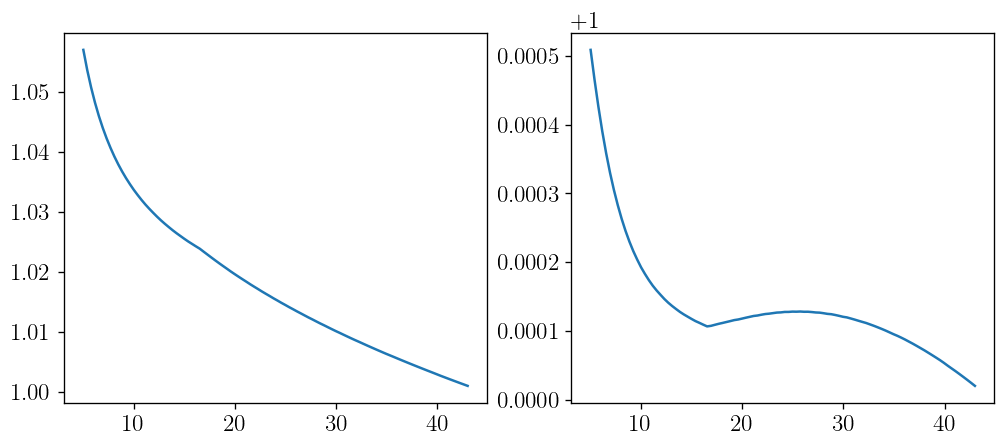

In [91]:
# relative error: not formatted
z_s = np.linspace(5, 43, 100)
T_21_s = np.interp(z_s, dc_soln['z'][::-1], dc_soln['T_k'][::-1])
T_dh_s = np.interp(z_s, dh_soln['rs'][::-1] - 1, dh_soln['Tm'][::-1]/phys.kB)

x_21_s = np.interp(z_s, dc_soln['z'][::-1], dc_soln['x_e'][::-1])
x_dh_s = np.interp(z_s, dh_soln['rs'][::-1] - 1, dh_soln['x'][::-1, 0])

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(z_s, T_dh_s/T_21_s)
axs[1].plot(z_s, x_21_s/x_dh_s)

## 2. Homogeneous injection

### 2.1 photon comparisons

In [ ]:
dc_run_name = 'xc_phph_noLX_nos8_noHe_nosp_lifetime25_zf001'
dh_run_name = 'xc_phph_noHe_lifetime25_zf001'
save_name = 'xc_phph_nos8_noHe_nosp_lifetime25_zf001'

In [ ]:
dc_run_name = 'xc_phph_noLX_nos8_noHe_nosp_lifetime25'
dh_run_name = 'xc_phph_noHe_lifetime25'
save_name = 'xc_phph_nos8_noHe_nosp_lifetime25'

In [15]:
dc_run_name = 'xc_phph_noLX_nos8_noHe_lifetime25'
dh_run_name = 'xc_phph_noHe_lifetime25'
save_name = 'xc_phph_nos8_noHe_lifetime25'

In [6]:
dc_run_name = 'xc_phph_noLX_nos8_lifetime25'
dh_run_name = 'xc_phph_lifetime25'
save_name = 'xc_phph_nos8_lifetime25'

In [27]:
dc_run_name = 'xc_phph_noLX_nopop2_lifetime25'
dh_run_name = 'xc_phph_lifetime25'
save_name = 'xc_phph_nopop2_lifetime25'

In [24]:
dc_run_name = 'xc_phph_noLX_lifetime25'
dh_run_name = 'xc_phph_lifetime25'
save_name = 'xc_phph_lifetime25'

### 2.2 electron comparisons

In [61]:
dc_run_name = 'xc_ee_noLX_nos8_noHe_nosp_lifetime25'
dh_run_name = 'xc_ee_noHe_lifetime25'
save_name = 'xc_ee_nos8_noHe_nosp_lifetime25'

In [58]:
dc_run_name = 'xc_ee_noLX_nos8_nosp_lifetime25'
dh_run_name = 'xc_ee_lifetime25'
save_name = 'xc_ee_nos8_nosp_lifetime25'

/tmp/ipykernel_554949/1175195791.py:54: RuntimeWarning: invalid value encountered in divide
  ax.plot(dc_soln['z'], dc_soln['dep_'+f_label]/dc_dep_tot, color=color_dict[f_label], ls=ls_dict['21'], lw=2, label=label_dict[f_label])


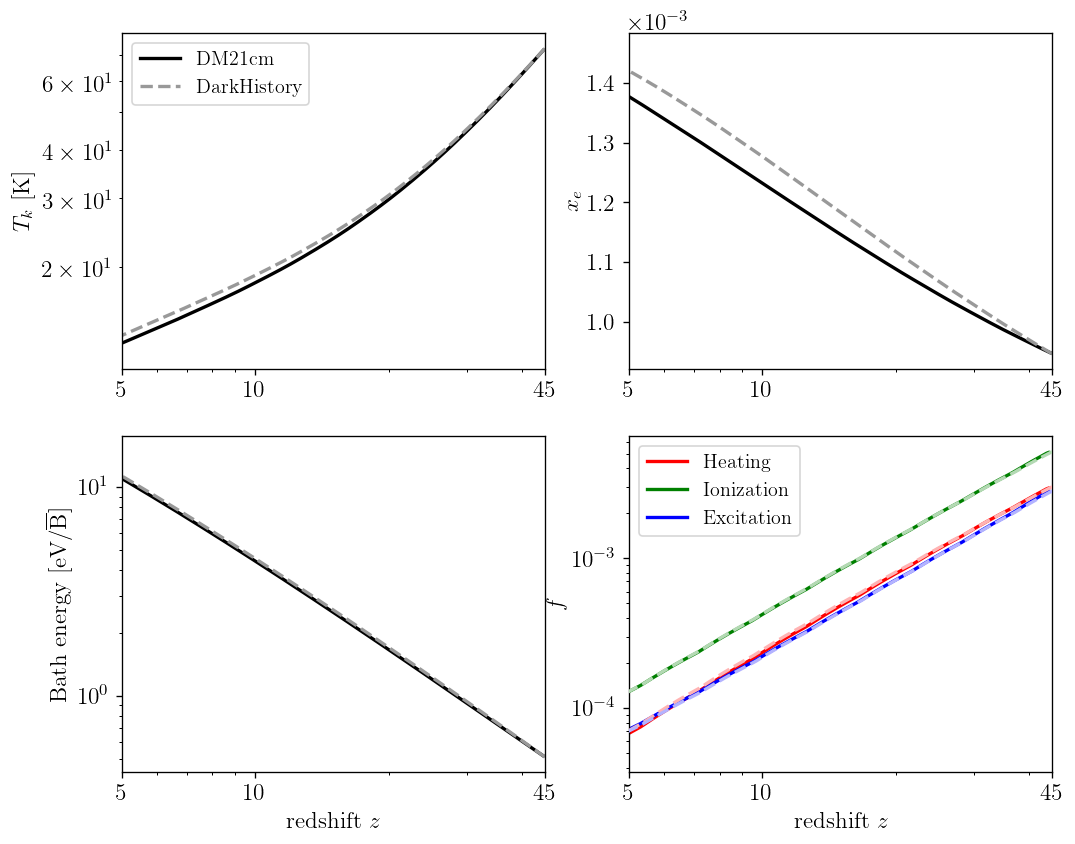

In [28]:
dc_soln = np.load(f'{WDIR}/outputs/dm21cm/{dc_run_name}_records.npy', allow_pickle=True).item()
dh_soln = pickle.load(open(f'{WDIR}/outputs/dh/{dh_run_name}_soln.p', 'rb'))
i_z_st_dh = np.argmin(np.abs(dh_soln['rs']-1 - z_plot_max))

def blend_white(c, alpha=0.7):
    white = np.array([1., 1., 1.])
    return tuple((1-alpha)*np.array(c) + alpha*white)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Tk
ax = axs[0,0]
ax.plot(dc_soln['z'], dc_soln['T_k'], color=color_dict['dc'], label=label_dict['dc'], ls=ls_dict['dc'], lw=2)
#ax.plot(dc_soln['z'][0], dc_soln['T_k'][0], color=color_dict['21'], marker='+', ms=7, zorder=10)
ax.plot(dh_soln['rs'][i_z_st_dh:] - 1, dh_soln['Tm'][i_z_st_dh:]/phys.kB, color=color_dict['dh'], label=label_dict['dh'], ls=ls_dict['dh'], lw=2)
ax.set(xlim=(z_plot_min, z_plot_max), xscale='log', yscale='log')
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.set(xticks=[5, 10, 45], xticklabels=['5', '10', '45'])
ax.set(ylabel='$T_k$ [K]')
ax.legend()

# x
ax = axs[0,1]
ax.plot(dc_soln['z'], dc_soln['x_e'], color=color_dict['dc'], label=label_dict['dc'], ls=ls_dict['dc'], lw=2)
#ax.plot(dc_soln['z'][0], dc_soln['x_e'][0], color=color_dict['21'], marker='+', ms=7, zorder=10)
ax.plot(dh_soln['rs'][i_z_st_dh:] - 1, dh_soln['x'][i_z_st_dh:, 0], color=color_dict['dh'], label=label_dict['dh'], ls=ls_dict['dh'], lw=2)
ax.set(xlim=(z_plot_min, z_plot_max), xscale='log')
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.set(xticks=[5, 10, 45], xticklabels=['5', '10', '45'])
ax.set(ylabel='$x_e$')
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))


# bath
ax = axs[1,0]
ax.plot(dc_soln['z'], dc_soln['E_phot'], color=color_dict['dc'], label=label_dict['dc'], ls=ls_dict['dc'], lw=2)
dh_bath_engs = [s.toteng() for s in dh_soln['highengphot']]
ax.plot(dh_soln['rs'][i_z_st_dh:] - 1, dh_bath_engs[i_z_st_dh:], color=color_dict['dh'], label=label_dict['dh'], ls=ls_dict['dh'], lw=2)
ax.set(xlim=(z_plot_min, z_plot_max), xscale='log', yscale='log')
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.set(xticks=[5, 10, 45], xticklabels=['5', '10', '45'])
ax.set(xlabel='redshift $z$', ylabel=r'Bath energy [eV/$\overline\mathrm{B}$]')

# f
ax = axs[1,1]
dh_fheat_s = dh_soln['f']['low']['heat'] + dh_soln['f']['high']['heat']
dh_fion_s = dh_soln['f']['low']['H ion'] + dh_soln['f']['high']['H ion'] + dh_soln['f']['low']['He ion'] + dh_soln['f']['high']['He ion']
dh_fexc_s = dh_soln['f']['low']['exc'] + dh_soln['f']['high']['exc']
dc_dep_tot = dc_soln['dE_inj_per_Bavg_unclustered']

for f_label, dh_f_s in zip(['heat', 'ion', 'exc'], [dh_fheat_s, dh_fion_s, dh_fexc_s]):
    color = color_dict[f_label]
    ax.plot(dh_soln['rs'][i_z_st_dh:] - 1, dh_f_s[i_z_st_dh:], color=blend_white(color), lw=2, ls='--', zorder=10)
    ax.plot(dc_soln['z'], dc_soln['dep_'+f_label]/dc_dep_tot, color=color_dict[f_label], ls=ls_dict['21'], lw=2, label=label_dict[f_label])
    
ax.set(xlim=(z_plot_min, z_plot_max), xscale='log', yscale='log')
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.set(xticks=[5, 10, 45], xticklabels=['5', '10', '45'])
ax.set(xlabel='redshift $z$', ylabel=r'$f$')
ax.legend()

fig.savefig(f'{save_name}.pdf', bbox_inches='tight')

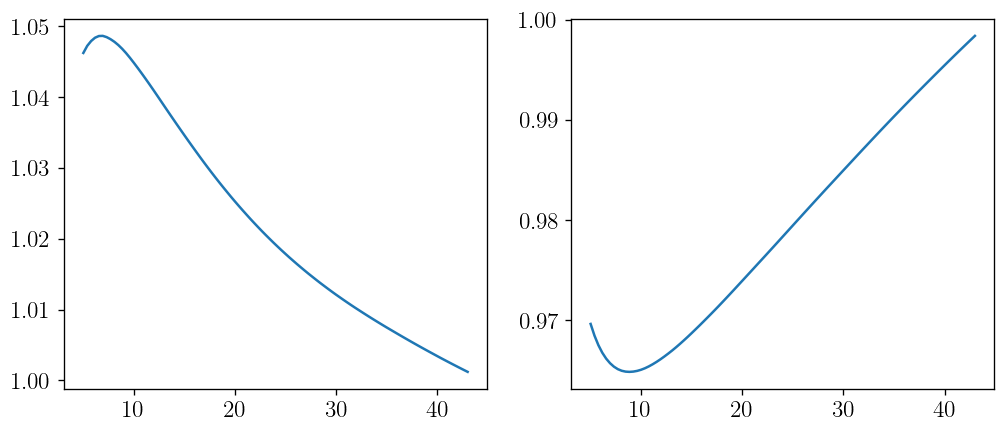

In [29]:
# relative error: not formatted
z_s = np.linspace(5, 43, 100)
T_21_s = np.interp(z_s, dc_soln['z'][::-1], dc_soln['T_k'][::-1])
T_dh_s = np.interp(z_s, dh_soln['rs'][::-1] - 1, dh_soln['Tm'][::-1]/phys.kB)

x_21_s = np.interp(z_s, dc_soln['z'][::-1], dc_soln['x_e'][::-1])
x_dh_s = np.interp(z_s, dh_soln['rs'][::-1] - 1, dh_soln['x'][::-1, 0])

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(z_s, T_dh_s/T_21_s)
axs[1].plot(z_s, x_21_s/x_dh_s)

## 3. Xray

### 3.1 ST homogeneous

In [11]:
dc_run_name = 'xc_xray_noLX_nos8_noHe_nosp'
dh_run_name = 'xc_xrayST_noHe'
save_name = 'xc_xrayVDH_nos8_noHe_nosp'

In [14]:
dc_run_name = 'xc_xray_noLX_nopop2_noHe_nosp'
dh_run_name = 'xc_xrayST_noHe'
save_name = 'xc_xrayVDH_nopop2_noHe_nosp'

In [17]:
dc_run_name = 'xc_xray_noLX_nopop2'
dh_run_name = 'xc_xrayST'
save_name = 'xc_xrayVDH_nopop2'

In [20]:
dc_run_name = 'xc_xray_noLX'
dh_run_name = 'xc_xrayST'
save_name = 'xc_xrayVDH'

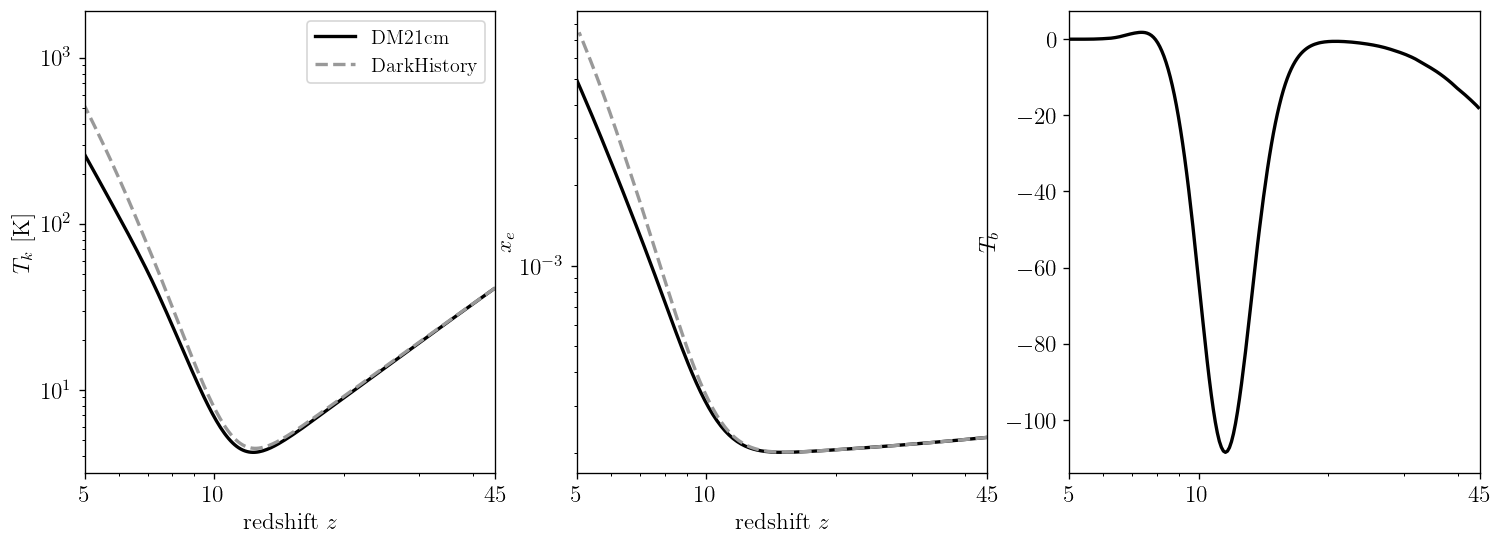

In [21]:
dc_soln = np.load(f'{WDIR}/outputs/dm21cm/{dc_run_name}_records.npy', allow_pickle=True).item()
dh_soln = pickle.load(open(f'{WDIR}/outputs/dh/{dh_run_name}_soln.p', 'rb'))
i_z_st_dh = np.argmin(np.abs(dh_soln['rs']-1 - z_plot_max))
i_z_ed_dh = np.argmin(np.abs(dh_soln['rs']-1 - z_plot_min))

def blend_white(c, alpha=0.7):
    white = np.array([1., 1., 1.])
    return tuple((1-alpha)*np.array(c) + alpha*white)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Tk
ax = axs[0]
ax.plot(dc_soln['z'], dc_soln['T_k'], color=color_dict['dc'], label=label_dict['dc'], ls=ls_dict['dc'], lw=2)
#ax.plot(dc_soln['z'][0], dc_soln['T_k'][0], color=color_dict['21'], marker='+', ms=7, zorder=10)
ax.plot(dh_soln['rs'][i_z_st_dh:] - 1, dh_soln['Tm'][i_z_st_dh:]/phys.kB, color=color_dict['dh'], label=label_dict['dh'], ls=ls_dict['dh'], lw=2)
ax.set(xlim=(z_plot_min, z_plot_max), xscale='log', yscale='log')
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.set(xticks=[5, 10, 45], xticklabels=['5', '10', '45'])
ax.set(ylabel='$T_k$ [K]', xlabel='redshift $z$')
ax.legend()

# x
ax = axs[1]
ax.plot(dc_soln['z'], dc_soln['x_e'], color=color_dict['dc'], label=label_dict['dc'], ls=ls_dict['dc'], lw=2)
#ax.plot(dc_soln['z'][0], dc_soln['x_e'][0], color=color_dict['21'], marker='+', ms=7, zorder=10)
ax.plot(dh_soln['rs'][i_z_st_dh:i_z_ed_dh] - 1, dh_soln['x'][i_z_st_dh:i_z_ed_dh, 0], color=color_dict['dh'], label=label_dict['dh'], ls=ls_dict['dh'], lw=2)
ax.set(xlim=(z_plot_min, z_plot_max), xscale='log', yscale='log')
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.set(xticks=[5, 10, 45], xticklabels=['5', '10', '45'])
ax.set(ylabel='$x_e$', xlabel='redshift $z$')
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

# # f
# ax = axs[2]
# dh_fheat_s = dh_soln['f']['low']['heat'] + dh_soln['f']['high']['heat']
# dh_fion_s = dh_soln['f']['low']['H ion'] + dh_soln['f']['high']['H ion'] + dh_soln['f']['low']['He ion'] + dh_soln['f']['high']['He ion']
# dh_fexc_s = dh_soln['f']['low']['exc'] + dh_soln['f']['high']['exc']
# dc_dep_tot = dc_soln['dE_inj_per_Bavg_unclustered']

# for f_label, dh_f_s in zip(['heat', 'ion', 'exc'], [dh_fheat_s, dh_fion_s, dh_fexc_s]):
#     color = color_dict[f_label]
#     ax.plot(dh_soln['rs'][i_z_st_dh:] - 1, dh_f_s[i_z_st_dh:], color=blend_white(color), lw=2, ls='--', zorder=10)
#     ax.plot(dc_soln['z'], dc_soln['dep_'+f_label]/dc_dep_tot, color=color_dict[f_label], ls=ls_dict['21'], lw=2, label=label_dict[f_label])
    
# ax.set(xlim=(z_plot_min, z_plot_max), xscale='log', yscale='log')
# ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
# ax.set(xticks=[5, 10, 45], xticklabels=['5', '10', '45'])
# ax.set(xlabel='redshift $z$', ylabel=r'$f$')
# ax.legend()

# Tb
ax = axs[2]
ax.plot(dc_soln['z'], dc_soln['T_b'], color=color_dict['dc'], label=label_dict['dc'], ls=ls_dict['dc'], lw=2)
ax.set(xlim=(z_plot_min, z_plot_max), xscale='log')
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.set(xticks=[5, 10, 45], xticklabels=['5', '10', '45'])
ax.set(ylabel='$T_b$')

# # 1-xH
# ax = axs[3]
# ax.plot(dc_soln['z'], dc_soln['1-x_H'], color=color_dict['dc'], label=label_dict['dc'], ls=ls_dict['dc'], lw=2)
# ax.plot(dh_soln['rs'][i_z_st_dh:i_z_ed_dh] - 1, dh_soln['x'][i_z_st_dh:i_z_ed_dh, 0], color=color_dict['dh'], label=label_dict['dh'], ls=ls_dict['dh'], lw=2)
# ax.set(xlim=(z_plot_min, z_plot_max), xscale='log', yscale='log')
# ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
# ax.set(xticks=[5, 10, 45], xticklabels=['5', '10', '45'])
# ax.set(ylabel='$1-x_H$')

fig.savefig(f'{save_name}.pdf', bbox_inches='tight')

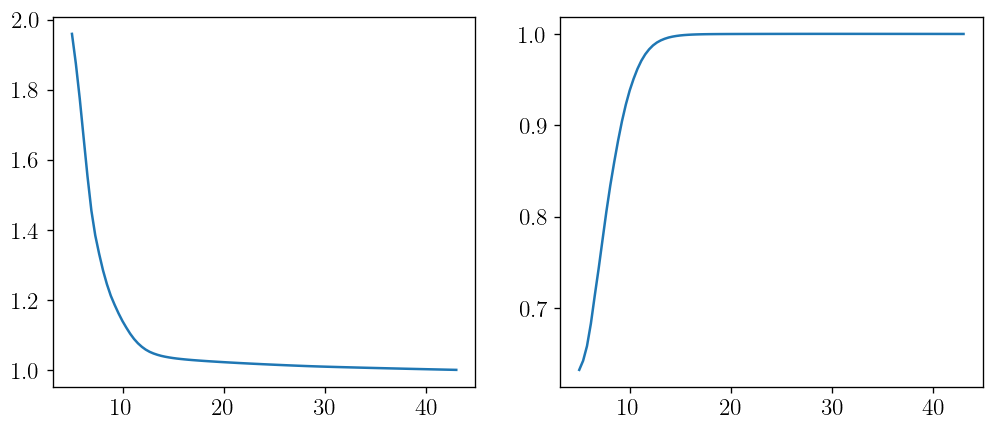

In [22]:
# relative error: not formatted
z_s = np.linspace(5, 43, 100)
T_21_s = np.interp(z_s, dc_soln['z'][::-1], dc_soln['T_k'][::-1])
T_dh_s = np.interp(z_s, dh_soln['rs'][::-1] - 1, dh_soln['Tm'][::-1]/phys.kB)

x_21_s = np.interp(z_s, dc_soln['z'][::-1], dc_soln['x_e'][::-1])
x_dh_s = np.interp(z_s, dh_soln['rs'][::-1] - 1, dh_soln['x'][::-1, 0])

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(z_s, T_dh_s/T_21_s)
axs[1].plot(z_s, x_21_s/x_dh_s)

In [9]:
plot_names = [
    #('dc', 'xc_xray_noLX_nos8_noHe_nosp'),
    #('dc', 'xc_xray_noLX_nos8_noHe_nosp_noatten'),
    #('dc', 'xc_xray_noLX_noHe_nosp'),
    #('dc', 'xc_xray_noLX_noHe_nosp_noatten'),
    ('dc', 'xc_xray_noLX_noHe_nosp_noatten_21totf_esf'),
    ('dc', 'xc_xray_noLX_noHe_nosp_noatten_21totf'),
    ('dc', 'xc_noHe_nosp'),
    ('dh', 'xc_xrayST_noHe'),
]
save_name = 'xc_xray_nos8_noHe_nosp'

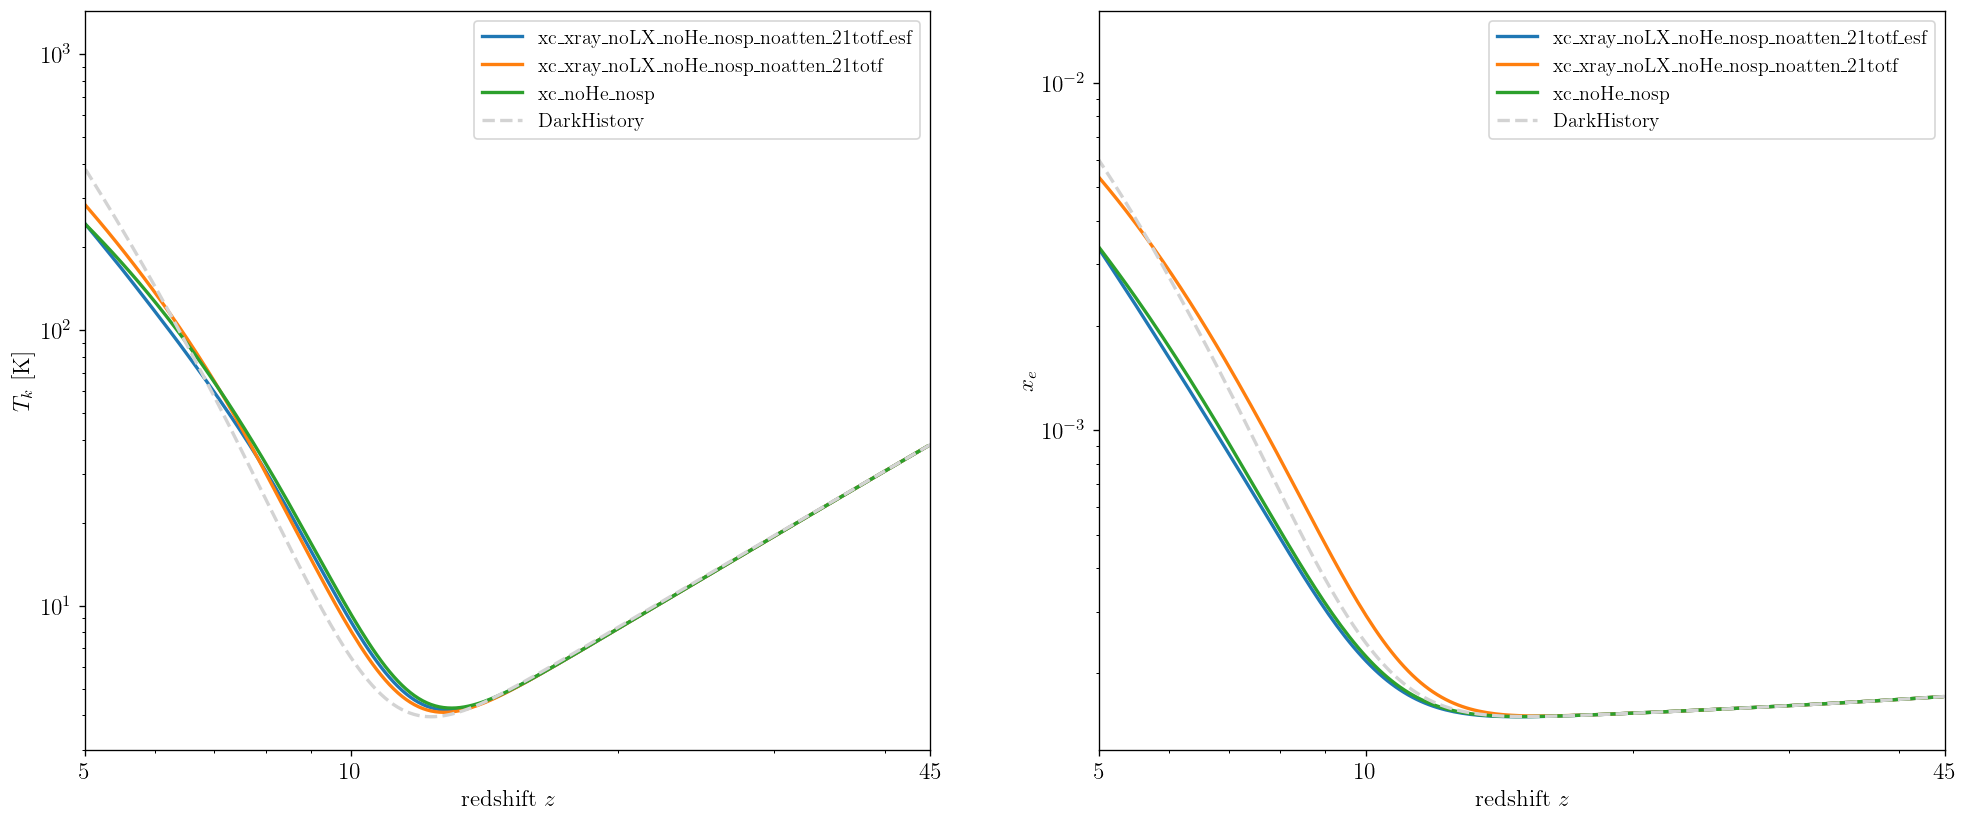

In [10]:
soln_s = []
for soln_type, run_name in plot_names:
    if soln_type == 'dc':
        soln = np.load(f'{WDIR}/outputs/dm21cm/{run_name}_records.npy', allow_pickle=True).item()
    elif soln_type == 'dh':
        soln = pickle.load(open(f'{WDIR}/outputs/dh/{run_name}_soln.p', 'rb'))
        i_z_st_dh = np.argmin(np.abs(soln['rs']-1 - z_plot_max))
    soln_s.append(soln)

fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Tk
ax = axs[0]
i_dc = 0
for soln, (soln_type, run_name) in zip(soln_s, plot_names):
    if soln_type == 'dc':
        ax.plot(soln['z'], soln['T_k'], color=f'C{i_dc}', label=run_name, ls=ls_dict['21'], lw=2)
        i_dc += 1
    elif soln_type == 'dh':
        ax.plot(soln['rs'][i_z_st_dh:] - 1, soln['Tm'][i_z_st_dh:]/phys.kB, color=color_dict['dh'], label=label_dict['dh'], ls=ls_dict['dh'], lw=2)
        
ax.set(xlim=(z_plot_min, z_plot_max), xscale='log', yscale='log')
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.set(xticks=[5, 10, 45], xticklabels=['5', '10', '45'])
ax.set(xlabel='redshift $z$', ylabel='$T_k$ [K]')
ax.legend()

# x
ax = axs[1]
i_dc = 0
for soln, (soln_type, run_name) in zip(soln_s, plot_names):
    if soln_type == 'dc':
        ax.plot(soln['z'], soln['x_e'], color=f'C{i_dc}', label=run_name, ls=ls_dict['21'], lw=2)
        i_dc += 1
    elif soln_type == 'dh':
        ax.plot(soln['rs'][i_z_st_dh:] - 1, soln['x'][i_z_st_dh:, 0], color=color_dict['dh'], label=label_dict['dh'], ls=ls_dict['dh'], lw=2)

ax.set(xlim=(z_plot_min, z_plot_max), xscale='log', yscale='log')
ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax.set(xticks=[5, 10, 45], xticklabels=['5', '10', '45'])
ax.set(xlabel='redshift $z$', ylabel='$x_e$')

#ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.legend()

fig.savefig(f'{save_name}.pdf', bbox_inches='tight')